In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
#import seaborn as sns

import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

from scipy.spatial import distance
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('C:\\Users\\Suyog\\OneDrive\\Desktop\\CricData\\cricket_player_stats.csv')

In [3]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_Test_M,BT_Test_Inn,BT_Test_NO,BT_Test_Runs,BT_Test_HS,BT_Test_Avg,BT_Test_BF,BT_Test_SR,BT_Test_100,BT_Test_200,BT_Test_50,BT_Test_4s,BT_Test_6s,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BT_T20I_M,BT_T20I_Inn,BT_T20I_NO,BT_T20I_Runs,BT_T20I_HS,BT_T20I_Avg,BT_T20I_BF,BT_T20I_SR,BT_T20I_100,BT_T20I_200,BT_T20I_50,BT_T20I_4s,BT_T20I_6s,BW_Test_M,BW_Test_Inn,BW_Test_B,BW_Test_Runs,BW_Test_Wkts,BW_Test_BBI,BW_Test_BBM,BW_Test_Econ,BW_Test_Avg,BW_Test_SR,BW_Test_5W,BW_Test_10W,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BW_T20I_M,BW_T20I_Inn,BW_T20I_B,BW_T20I_Runs,BW_T20I_Wkts,BW_T20I_BBM,BW_T20I_Econ,BW_T20I_Avg,BW_T20I_SR,BW_T20I_5W,BW_T20I_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",200,329,33,15921,248,53.79,29437,54.08,51,6,68,2058,69,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,1,1,0,10,10,10.00,12,83.33,0,0,0,2,0,200,145,4240,2492,46,3 for 10,3 for 14,3.53,54.17,92.17,0,0,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1,1,15,12,1,1 for 12,4.8,12.0,15.0,0,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",104,180,6,8586,319,49.34,10441,82.23,23,6,32,1233,91,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,19,18,0,394,68,21.89,271,145.39,0,0,2,43,16,104,91,3731,1894,40,5 for 104,5 for 118,3.05,47.35,93.28,1,0,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,19,1,6,20,0,0 for 20,20.0,0.0,0.0,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",164,286,32,13288,270,52.31,31258,42.51,36,5,63,1655,21,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,1,1,0,31,31,31.00,21,147.62,0,0,0,0,3,164,5,120,39,1,1 for 18,1 for 18,1.95,39.00,120.00,0,0,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",134,225,32,8781,281,45.50,17785,49.37,17,2,56,1135,5,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,134,13,324,126,2,1 for 2,1 for 2,2.33,63.00,162.00,0,0,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",113,188,17,7212,239,42.18,14070,51.26,16,1,35,900,57,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,113,99,3117,1681,32,3 for 28,3 for 37,3.24,52.53,97.41,0,0,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0


In [4]:
df.isna().sum().max()

4

In [5]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_Test_M',
       'BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
       'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
       'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs',
       'BT_T20I_HS', 'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100',
       'BT_T20I_200', 'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s', 'BW_Test_M',
       'BW_Test_Inn', 'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts',
       'BW_Test_BBI', 'BW_Test_BBM', 'BW_Test_Econ', 'BW_Test_Avg',
       'BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_OD

In [6]:
df = df.drop(columns= ['BT_Test_M','BT_Test_Inn', 'BT_Test_NO', 'BT_Test_Runs', 'BT_Test_HS',
              'BT_Test_Avg', 'BT_Test_BF', 'BT_Test_SR', 'BT_Test_100', 'BT_Test_200',
              'BT_Test_50', 'BT_Test_4s', 'BT_Test_6s','BW_Test_M','BW_Test_Inn', 
              'BW_Test_B', 'BW_Test_Runs', 'BW_Test_Wkts','BW_Test_BBI', 'BW_Test_BBM', 
              'BW_Test_Econ', 'BW_Test_Avg','BW_Test_SR', 'BW_Test_5W', 'BW_Test_10W',
              'BT_T20I_M', 'BT_T20I_Inn', 'BT_T20I_NO', 'BT_T20I_Runs','BT_T20I_HS', 
              'BT_T20I_Avg', 'BT_T20I_BF', 'BT_T20I_SR', 'BT_T20I_100','BT_T20I_200', 
              'BT_T20I_50', 'BT_T20I_4s', 'BT_T20I_6s','BW_T20I_M','BW_T20I_Inn',
              'BW_T20I_B', 'BW_T20I_Runs', 'BW_T20I_Wkts','BW_T20I_BBM', 'BW_T20I_Econ', 
              'BW_T20I_Avg', 'BW_T20I_SR','BW_T20I_5W', 'BW_T20I_10W'])

In [7]:
df.head()

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0


In [8]:
nan1 = df[df.isna().any(axis=1)]
nan1

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W


In [9]:
df[['BW_ODI_Avg', 'BW_ODI_SR']] = df[['BW_ODI_Avg', 'BW_ODI_SR']].fillna(0)

In [10]:
df.isna().sum().max()

0

In [11]:
dobdf = df['date_of_birth'].str.extract(r'(\d{4})')

In [12]:
dobdf = dobdf.fillna(0)
dobdf.tail()

,0
5712,1990
5713,1996
5714,1991
5715,1994
5716,0


In [13]:
df['year'] = dobdf.astype(int)

In [14]:
df

,Unnamed: 0,name,team,date_of_birth,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
0,0,Sachin Tendulkar,India,"Apr 24, 1973 (49 years)",463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1973
1,1,Virender Sehwag,India,"Oct 20, 1978 (44 years)",251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,1978
2,2,Rahul Dravid,India,"Jan 11, 1973 (49 years)",344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1973
3,3,VVS Laxman,India,"Nov 01, 1974 (48 years)",86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,1974
4,4,Sourav Ganguly,India,"Jul 08, 1972 (50 years)",311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,1972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,5712,Imran Khan,Bahrain,"Apr 01, 1990 (32 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1990
5713,5713,Shahrukh Quddus,Kuwait,"Dec 11, 1996 (26 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1996
5714,5714,Ateeq Iqbal,Hong Kong,"Dec 10, 1991 (31 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1991
5715,5715,Ali Zaheer,Kuwait,"Feb 08, 1994 (28 years)",0,0,0,0,0,0.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1994


In [15]:
df.columns

Index(['Unnamed: 0', 'name', 'team', 'date_of_birth', 'BT_ODI_M', 'BT_ODI_Inn',
       'BT_ODI_NO', 'BT_ODI_Runs', 'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF',
       'BT_ODI_SR', 'BT_ODI_100', 'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s',
       'BT_ODI_6s', 'BW_ODI_M', 'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs',
       'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR',
       'BW_ODI_5W', 'BW_ODI_10W', 'year'],
      dtype='object')

In [16]:
df.drop(['Unnamed: 0', 'date_of_birth'],axis=1,inplace=True)

In [17]:
df.head()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
0,Sachin Tendulkar,India,463,452,41,18426,200,44.83,21367,86.24,49,1,96,2016,195,463,270,8054,6850,154,5 for 32,5.10,44.48,52.30,2,0,1973
1,Virender Sehwag,India,251,245,9,8273,219,35.06,7929,104.34,15,1,38,1132,136,251,146,4392,3853,96,4 for 6,5.26,40.14,45.75,0,0,1978
2,Rahul Dravid,India,344,318,40,10889,153,39.17,15284,71.24,12,0,83,950,42,344,8,186,170,4,2 for 43,5.48,42.50,46.50,0,0,1973
3,VVS Laxman,India,86,83,7,2338,131,30.76,3282,71.24,6,0,10,222,4,86,4,42,40,0,0 for 5,5.71,0.00,0.00,0,0,1974
4,Sourav Ganguly,India,311,300,21,11363,183,40.73,15416,73.71,22,0,72,1122,190,311,171,4561,3849,100,5 for 16,5.06,38.49,45.61,2,0,1972


In [18]:
df1 = df[df['year']>=1986]

In [19]:
df1.tail()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
5711,Sachin Kumar,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1989
5712,Imran Khan,Bahrain,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1990
5713,Shahrukh Quddus,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1996
5714,Ateeq Iqbal,Hong Kong,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1991
5715,Ali Zaheer,Kuwait,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1994


In [20]:
df1.shape

(2001, 27)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2001 entries, 91 to 5715
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2001 non-null   object 
 1   team         2001 non-null   object 
 2   BT_ODI_M     2001 non-null   int64  
 3   BT_ODI_Inn   2001 non-null   int64  
 4   BT_ODI_NO    2001 non-null   int64  
 5   BT_ODI_Runs  2001 non-null   int64  
 6   BT_ODI_HS    2001 non-null   int64  
 7   BT_ODI_Avg   2001 non-null   float64
 8   BT_ODI_BF    2001 non-null   int64  
 9   BT_ODI_SR    2001 non-null   float64
 10  BT_ODI_100   2001 non-null   int64  
 11  BT_ODI_200   2001 non-null   int64  
 12  BT_ODI_50    2001 non-null   int64  
 13  BT_ODI_4s    2001 non-null   int64  
 14  BT_ODI_6s    2001 non-null   int64  
 15  BW_ODI_M     2001 non-null   int64  
 16  BW_ODI_Inn   2001 non-null   int64  
 17  BW_ODI_B     2001 non-null   int64  
 18  BW_ODI_Runs  2001 non-null   int64  
 19  BW_OD

In [22]:
print(f'Rows in DataFrame before split: {df1.shape[0]}')
odi_cricket_playing_nations = ['Australia', 'England', 'Ireland','India', 'Pakistan', 'New Zealand', 'West Indies', 'South Africa', 'Sri Lanka', 'Afghanistan', 'Bangladesh']
df1 = df1[df1['team'].isin(odi_cricket_playing_nations)]
print(f'Rows in DataFrame after split: {df1.shape[0]}')

Rows in DataFrame before split: 2001
Rows in DataFrame after split: 922


In [23]:
df = df1

In [24]:
df.head()

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,year
101,Nazmul Hossain,Bangladesh,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,1987
158,Zulqarnain Haider,Pakistan,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,1986
195,Enamul Haque jnr,Bangladesh,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,3 for 16,4.40,30.14,41.14,0,0,1986
196,Shahadat Hossain,Bangladesh,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,3 for 34,5.85,45.60,46.77,0,0,1986
198,Mushfiqur Rahim,Bangladesh,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0,0.00,0.00,0.00,0,0,1987


In [25]:
df = df.loc[(df['BT_ODI_M']> 0) | (df['BW_ODI_M']> 0)]

In [26]:
df.shape

(584, 27)

In [27]:
df['BT_ODI_SR'].describe()

count    584.000000
mean      71.230856
std       35.161173
min        0.000000
25%       54.120000
50%       75.980000
75%       90.652500
max      300.000000
Name: BT_ODI_SR, dtype: float64

In [28]:
def boundary_rate(player):
    num_of_fours = player['BT_ODI_4s']
    num_of_sixes = player['BT_ODI_6s']
    balls_faced = player['BT_ODI_BF']
    if (balls_faced > (num_of_fours + num_of_sixes)):
        return round((num_of_fours + num_of_sixes) / balls_faced, 3)
    else:
        return 0
    
df['BT_ODI_BR'] = df.apply(lambda row: boundary_rate(row), axis=1)

In [29]:
df2 = df[(np.abs(stats.zscore(df['BT_ODI_BR'])) > 3)]
print(df2.shape)
df2[["name", "year", "BT_ODI_M", "BT_ODI_Runs","team", "BT_ODI_BF", "BT_ODI_SR", "BT_ODI_BR"]]

(6, 28)


,name,year,BT_ODI_M,BT_ODI_Runs,team,BT_ODI_BF,BT_ODI_SR,BT_ODI_BR
3891,Nasum Ahmed,1994,4,18,Bangladesh,11,163.64,0.273
4146,Daryn Dupavillon,1994,2,17,South Africa,10,170.00,0.300
4362,Odean Smith,1996,5,144,West Indies,75,192.00,0.293
4475,Muhammad Musa,2000,2,9,Pakistan,3,300.00,0.667
4668,Mohammad Hasnain,2000,8,43,Pakistan,26,165.38,0.308
4701,Ravi Bishnoi,2000,1,4,India,2,200.00,0.500


In [30]:
df.drop(df2.index,axis=0,inplace=True)

In [31]:
df.shape

(578, 28)

In [32]:
df.columns

Index(['name', 'team', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'year', 'BT_ODI_BR'],
      dtype='object')

In [33]:
t_df = df[['name', 'team', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M', 'BW_ODI_Inn',
       'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM', 'BW_ODI_Econ',
       'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W','BT_ODI_BR']]

In [34]:
t_df

,name,team,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
101,Nazmul Hossain,Bangladesh,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,0.000
158,Zulqarnain Haider,Pakistan,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,0.044
195,Enamul Haque jnr,Bangladesh,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,3 for 16,4.40,30.14,41.14,0,0,0.000
196,Shahadat Hossain,Bangladesh,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,3 for 34,5.85,45.60,46.77,0,0,0.053
198,Mushfiqur Rahim,Bangladesh,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0,0.00,0.00,0.00,0,0,0.072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,Maheesh Theekshana,Sri Lanka,12,7,5,31,11,15.50,71,43.66,0,0,0,1,0,12,12,654,491,13,4 for 37,4.50,37.77,50.31,0,0,0.014
5126,Shahnawaz Dahani,Pakistan,2,2,2,4,4,0.00,3,133.33,0,0,0,0,0,2,2,96,73,1,1 for 36,4.56,73.00,96.00,0,0,0.000
5129,Umran Malik,India,5,2,2,0,0,0.00,4,0.00,0,0,0,0,0,5,4,198,198,7,2 for 43,6.00,28.29,28.29,0,0,0.000
5131,Graham Hume,South Africa,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0 for 62,6.89,0.00,0.00,0,0,0.000


In [35]:
team_df = t_df.copy()

In [36]:
t_df.drop(['team'],axis=1,inplace=True)

In [37]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,4 for 40,4.95,30.86,37.37,0,0,0.000
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0,0.00,0.00,0.00,0,0,0.044
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,3 for 16,4.40,30.14,41.14,0,0,0.000
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,3 for 34,5.85,45.60,46.77,0,0,0.053
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0,0.00,0.00,0.00,0,0,0.072


In [38]:
def conversion(str):
    if str != '0':
        try:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            k = nl[0]/nl[1]
            return k
        except:
            l = str.split()
            l.remove('for')
            nl = [float(x) for x in l]
            if nl[0] !=0:
                return nl[0]
            else:
                return 0
    else:
        return 0

In [39]:
t_df['BW_ODI_BBM'] = t_df['BW_ODI_BBM'].apply(conversion)

In [40]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,0.187500,4.40,30.14,41.14,0,0,0.000
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,0.088235,5.85,45.60,46.77,0,0,0.053
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072


In [41]:
t_df.shape

(578, 26)

In [42]:
t_df['mor_cols'] = t_df['BT_ODI_NO']+ t_df['BT_ODI_Runs']+ t_df['BT_ODI_HS']+ t_df['BT_ODI_Avg']+\
                t_df['BT_ODI_SR'] + t_df['BT_ODI_100']+ t_df['BT_ODI_200']+ t_df['BT_ODI_50']+\
                t_df['BT_ODI_4s']+ t_df['BT_ODI_6s']+ t_df['BW_ODI_Wkts'] + t_df['BW_ODI_5W'] + t_df['BW_ODI_10W']+t_df['BT_ODI_BR']

t_df['less_cols'] = t_df['BW_ODI_Runs'] + t_df['BW_ODI_Econ'] + t_df['BW_ODI_Avg'] + t_df['BW_ODI_SR']

In [43]:
t_df['impact_col'] = np.sqrt(t_df['mor_cols']/t_df['less_cols'])

In [44]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,inf
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,0.187500,4.40,30.14,41.14,0,0,0.000,98.160,497.68,0.444112
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,0.088235,5.85,45.60,46.77,0,0,0.053,227.273,2241.22,0.318443
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,7776.082,0.00,inf


In [45]:
df3 = t_df[(t_df['BT_ODI_Inn'] == 0) & (t_df['BW_ODI_Inn'] == 0)]

In [46]:
df3

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
3676,Zafar Ansari,1,0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN
3957,Mohibullah Oryakhel,2,0,0,0,0,0.0,0,0.0,0,0,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,NaN


In [47]:
t_df.drop(df3.index,axis=0,inplace=True)

In [48]:
t_df

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,inf
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,0.187500,4.40,30.14,41.14,0,0,0.000,98.160,497.68,0.444112
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,0.088235,5.85,45.60,46.77,0,0,0.053,227.273,2241.22,0.318443
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,7776.082,0.00,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,Maheesh Theekshana,12,7,5,31,11,15.50,71,43.66,0,0,0,1,0,12,12,654,491,13,0.108108,4.50,37.77,50.31,0,0,0.014,120.174,583.58,0.453790
5126,Shahnawaz Dahani,2,2,2,4,4,0.00,3,133.33,0,0,0,0,0,2,2,96,73,1,0.027778,4.56,73.00,96.00,0,0,0.000,144.330,246.56,0.765098
5129,Umran Malik,5,2,2,0,0,0.00,4,0.00,0,0,0,0,0,5,4,198,198,7,0.046512,6.00,28.29,28.29,0,0,0.000,9.000,260.58,0.185845
5131,Graham Hume,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0.000000,6.89,0.00,0.00,0,0,0.000,78.640,68.89,1.068424


In [49]:
t_df.shape

(576, 29)

In [50]:
t_df = t_df.replace([np.inf,np.nan],100)

In [51]:
t_df

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,mor_cols,less_cols,impact_col
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,128.720,1400.18,0.303201
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,166.634,0.00,100.000000
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,0.187500,4.40,30.14,41.14,0,0,0.000,98.160,497.68,0.444112
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,0.088235,5.85,45.60,46.77,0,0,0.053,227.273,2241.22,0.318443
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,7776.082,0.00,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,Maheesh Theekshana,12,7,5,31,11,15.50,71,43.66,0,0,0,1,0,12,12,654,491,13,0.108108,4.50,37.77,50.31,0,0,0.014,120.174,583.58,0.453790
5126,Shahnawaz Dahani,2,2,2,4,4,0.00,3,133.33,0,0,0,0,0,2,2,96,73,1,0.027778,4.56,73.00,96.00,0,0,0.000,144.330,246.56,0.765098
5129,Umran Malik,5,2,2,0,0,0.00,4,0.00,0,0,0,0,0,5,4,198,198,7,0.046512,6.00,28.29,28.29,0,0,0.000,9.000,260.58,0.185845
5131,Graham Hume,1,1,1,7,7,0.00,11,63.64,0,0,0,0,0,1,1,54,62,0,0.000000,6.89,0.00,0.00,0,0,0.000,78.640,68.89,1.068424


In [52]:
t_df.drop(['mor_cols', 'less_cols'], axis=1, inplace=True)

In [53]:
t_df.columns

Index(['name', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'BT_ODI_BR', 'impact_col'],
      dtype='object')

In [54]:
t_df_col = ['BT_ODI_NO', 'BT_ODI_Runs','BT_ODI_HS', 'BT_ODI_Avg', 
           'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100','BT_ODI_200', 
           'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_B', 
           'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM','BW_ODI_Econ', 
           'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W','BT_ODI_BR', 'impact_col']

In [55]:
t_df.isna().sum().max()

0

In [56]:
t_df = t_df[~t_df['name'].isin(['Aaron Finch','Eoin Morgan','Pragyan Ojha','Piyush Chawla','Karn Sharma','Cheteshwar Pujara','Sudeep Tyagi',
                                'Saurabh Tiwary','Abhimanyu Mithun','Rahul Sharma','Junaid Khan',
                                'Suresh Raina'])]

In [57]:
from sklearn.cluster import KMeans

inertia = []
for n in range(1,15):
    kmeans = KMeans(n_clusters = n, random_state = 8)
    kmeans.fit(t_df[t_df_col])
    inertia.append(kmeans.inertia_)

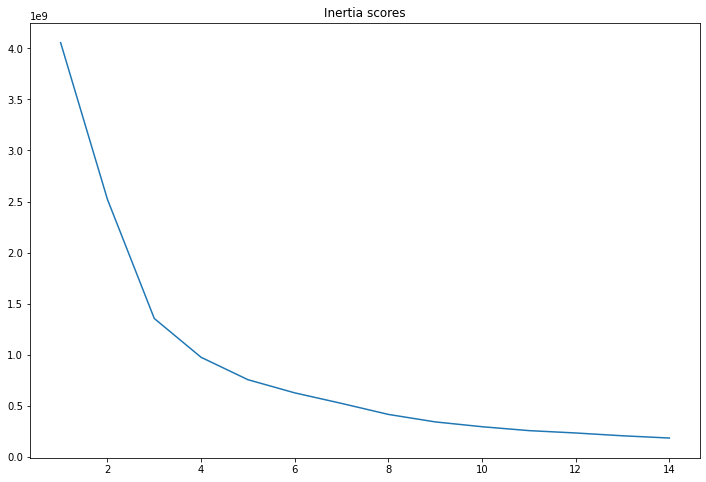

In [58]:
plt.figure(figsize= (12,8))
plt.plot(range(1,15),inertia)
plt.title('Inertia scores')
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 6, random_state = 8)
t_df['cluster'] = kmeans.fit_predict(t_df[t_df_col])

In [60]:
t_df.head()

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,impact_col,cluster
101,Nazmul Hossain,37,21,13,35,6,4.38,128,27.34,0,0,0,0,0,37,36,1607,1327,43,0.100000,4.95,30.86,37.37,0,0,0.000,0.303201,0
158,Zulqarnain Haider,4,4,2,48,19,24.00,68,70.59,0,0,0,3,0,4,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.044,100.000000,1
195,Enamul Haque jnr,10,5,1,12,5,3.00,19,63.16,0,0,0,0,0,10,10,576,422,14,0.187500,4.40,30.14,41.14,0,0,0.000,0.444112,1
196,Shahadat Hossain,51,27,17,79,16,7.90,151,52.32,0,0,0,7,1,51,50,2198,2143,47,0.088235,5.85,45.60,46.77,0,0,0.053,0.318443,0
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,100.000000,4


In [61]:
t_df.columns

Index(['name', 'BT_ODI_M', 'BT_ODI_Inn', 'BT_ODI_NO', 'BT_ODI_Runs',
       'BT_ODI_HS', 'BT_ODI_Avg', 'BT_ODI_BF', 'BT_ODI_SR', 'BT_ODI_100',
       'BT_ODI_200', 'BT_ODI_50', 'BT_ODI_4s', 'BT_ODI_6s', 'BW_ODI_M',
       'BW_ODI_Inn', 'BW_ODI_B', 'BW_ODI_Runs', 'BW_ODI_Wkts', 'BW_ODI_BBM',
       'BW_ODI_Econ', 'BW_ODI_Avg', 'BW_ODI_SR', 'BW_ODI_5W', 'BW_ODI_10W',
       'BT_ODI_BR', 'impact_col', 'cluster'],
      dtype='object')

In [62]:
t_df.cluster.value_counts()

1    395
0     72
2     52
5     29
4     13
3      3
Name: cluster, dtype: int64

In [63]:
df_cl1 = t_df[t_df['cluster'] == 0]
df_cl2 = t_df[t_df['cluster'] == 1]
df_cl3 = t_df[t_df['cluster'] == 2]
df_cl4 = t_df[t_df['cluster'] == 3]
df_cl5 = t_df[t_df['cluster'] == 4]
df_cl6 = t_df[t_df['cluster'] == 5]

In [64]:
df_cl3.name.values

array(['Chamara Kapugedera', 'Tanmay Mishra', 'Gary Wilson',
       'Junaid Siddique', 'Sarfaraz Ahmed', 'Nasir Jamshed',
       'Ajinkya Rahane', 'Imrul Kayes', 'Darren Bravo', 'Matthew Wade',
       'Ahmed Shehzad', 'Umar Akmal', 'Jos Buttler', 'Asghar Afghan',
       'Noor Ali Zadran', 'Samiullah Shinwari', 'Mohammad Shahzad',
       'Raqibul Hasan', 'Lahiru Thirimanne', 'Dinesh Chandimal',
       'David Miller', 'Asad Shafiq', 'Jonny Bairstow', 'Jason Roy',
       'Usman Khawaja', 'Andrew Balbirnie', 'Alex Hales',
       'Niroshan Dickwella', 'Johnson Charles', 'Kusal Perera',
       'Tom Latham', 'Sabbir Rahman', 'Soumya Sarkar', 'Anamul Haque',
       'Hashmatullah Shahidi', 'Haris Sohail', 'Imam-ul-Haq',
       'Najibullah Zadran', 'Danushka Gunathilaka', 'Travis Head',
       'Litton Das', 'Rahmat Shah', 'Evin Lewis', 'KL Rahul',
       'Alex Carey', 'Nicholas Pooran', 'Shreyas Iyer', 'Kusal Mendis',
       'Rassie van der Dussen', 'Shimron Hetmyer', 'Henry Nicholls',
       'F

In [65]:
print(df_cl1.shape,df_cl2.shape,df_cl3.shape,df_cl4.shape,df_cl5.shape,df_cl6.shape)

(72, 28) (395, 28) (52, 28) (3, 28) (13, 28) (29, 28)


In [66]:
def get_df(name):
    for df in [df_cl1,df_cl2,df_cl3,df_cl4,df_cl5,df_cl6]:
        if any(np.isin(df.name.values,name) == True):
            return df
        else:
            pass

def player_recommendation(name):
    recommendation = []
    r_df = get_df(name)
    a = r_df.loc[r_df['name'] == name][t_df_col]
    a = np.array(a)
    for num in r_df.index:
        b = r_df.loc[r_df.index == num][t_df_col]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([r_df.loc[r_df.index == num]['name'],c])
        recommendation.sort(key = lambda a: a[1])
        
    return [recommendation[1][0].values[0], recommendation[2][0].values[0], recommendation[3][0].values[0], recommendation[4][0].values[0]]

In [67]:
get_df('Virat Kohli')

,name,BT_ODI_M,BT_ODI_Inn,BT_ODI_NO,BT_ODI_Runs,BT_ODI_HS,BT_ODI_Avg,BT_ODI_BF,BT_ODI_SR,BT_ODI_100,BT_ODI_200,BT_ODI_50,BT_ODI_4s,BT_ODI_6s,BW_ODI_M,BW_ODI_Inn,BW_ODI_B,BW_ODI_Runs,BW_ODI_Wkts,BW_ODI_BBM,BW_ODI_Econ,BW_ODI_Avg,BW_ODI_SR,BW_ODI_5W,BW_ODI_10W,BT_ODI_BR,impact_col,cluster
198,Mushfiqur Rahim,239,224,36,6811,144,36.23,8646,78.78,8,0,42,535,85,239,0,0,0,0,0.000000,0.00,0.00,0.00,0,0,0.072,100.000000,4
314,Rohit Sharma,235,228,34,9454,264,48.73,10572,89.42,29,3,46,862,256,235,38,593,515,8,0.074074,5.21,64.38,74.12,0,0,0.106,4.103949,4
339,Tamim Iqbal,231,229,11,8074,158,37.04,10265,78.66,14,0,55,890,101,231,2,6,13,0,0.000000,13.00,0.00,0.00,0,0,0.097,19.033166,4
499,Paul Stirling,138,136,3,5172,177,38.89,5958,86.81,13,0,26,556,119,138,76,2441,1942,43,0.109091,4.77,45.16,56.77,1,0,0.113,1.744646,4
558,Virat Kohli,265,256,39,12471,183,57.47,13408,93.01,44,0,64,1172,128,265,48,641,665,4,0.066667,6.22,166.25,160.25,0,0,0.097,3.779967,4
596,Martin Guptill,198,195,18,7346,237,41.50,8414,87.31,18,1,39,751,187,198,12,109,98,4,0.333333,5.39,24.50,27.25,0,0,0.111,7.501416,4
666,David Warner,141,139,5,6007,179,44.83,6306,95.26,19,0,27,638,92,141,1,6,8,0,0.000000,8.00,0.00,0.00,0,0,0.116,21.076062,4
829,Steven Smith,139,124,15,4917,164,45.11,5610,87.65,12,0,29,431,47,139,40,1076,971,28,0.187500,5.41,34.68,38.43,0,0,0.085,2.345916,4
3433,Kane Williamson,158,150,16,6391,148,47.69,7887,81.03,13,0,40,580,51,158,65,1467,1310,37,0.181818,5.36,35.41,39.65,0,0,0.080,2.307723,4
3693,Joe Root,158,147,23,6207,133,50.06,7140,86.93,16,0,36,496,46,158,69,1553,1494,26,0.057692,5.77,57.46,59.73,0,0,0.076,2.098420,4


In [68]:
player_recommendation('Virat Kohli')

['Rohit Sharma', 'Tamim Iqbal', 'Martin Guptill', 'Mushfiqur Rahim']

In [69]:
def player_team_recommendation(name):
    recommendations = []
    r_df = get_df(name)
    a = r_df.loc[r_df['name'] == name][t_df_col].values
    for _, row in r_df.iterrows():
        if row['name'] != name:
            b = row[t_df_col].values
            c = distance.euclidean(a,b)
            recommendations.append([row['name'],c])
    recommendations.sort(key=lambda x: x[1])
    return [rec[0] for rec in recommendations]

In [70]:
player_team_recommendation('Jasprit Bumrah')

['Josh Hazlewood',
 'Yuzvendra Chahal',
 'Steven Finn',
 'Matt Henry',
 'Praveen Kumar',
 'Sunil Narine',
 'Mark Wood',
 'Hasan Ali',
 'Mohammad Amir',
 'Wayne Parnell',
 'Alzarri Joseph',
 'Mehidy Hasan Miraz',
 'Andy McBrine',
 'David Willey',
 'Mujeeb Ur Rahman',
 'Shafiul Islam',
 'Andile Phehlukwayo',
 'Lockie Ferguson',
 'James Faulkner',
 'Taskin Ahmed',
 'Nuwan Pradeep',
 'Mitchell McClenaghan',
 'Shadab Khan',
 'Ashley Nurse',
 'Shahadat Hossain',
 'Axar Patel',
 'Andre Russell',
 'Imad Wasim',
 'Hardik Pandya',
 'Barry McCarthy',
 'Tabraiz Shamsi',
 'Adam Milne',
 'Lungi Ngidi',
 'Akila Dananjaya',
 'Chris Morris',
 'Gulbadin Naib',
 'Ish Sodhi',
 'Carlos Brathwaite',
 'Sheldon Cottrell',
 'Mirwais Ashraf',
 'Dushmantha Chameera',
 'Craig Young',
 'Chris Jordan',
 'James Neesham',
 'Nathan Coulter-Nile',
 'Hamid Hassan',
 'Shaheen Afridi',
 'Nathan Lyon',
 'Lakshan Sandakan',
 'Nazmul Hossain',
 'Akeal Hosein',
 'Shardul Thakur',
 'Wanindu Hasaranga',
 'Amir Hamza',
 'Colin d

In [71]:
def player_in_team(name):
    sim_players = player_team_recommendation(name)
    team = team_df.loc[team_df['name'] == name, 'team'].iloc[0]
    sim_players_same_team = team_df.loc[(team_df['name'].isin(sim_players)) & (team_df['team'] == team), 'name'].tolist()
    if len(sim_players_same_team) > 5:
        return sim_players_same_team[:5]
    else:
        return sim_players_same_team
    
player_in_team('Virat Kohli')

['Rohit Sharma']

In [72]:
pl_list = ['David Warner','KL Rahul','Kane Williamson',
           'Ben Stokes','Ravindra Jadeja','Moeen Ali',
           'Jason Holder','Kagiso Rabada','Yuzvendra Chahal',
           'Trent Boult','Rashid Khan'
           ]

def team_recom(pl_list):
    opp_list = []

    for x in pl_list:
        new_pls = player_recommendation(x)
        if ((new_pls[0] not in opp_list) and (new_pls[0] not in pl_list)):
            opp_list.append(new_pls[0])
        elif ((new_pls[1] not in opp_list) and (new_pls[1] not in pl_list)):
            opp_list.append(new_pls[1])
        elif ((new_pls[2] not in opp_list) and (new_pls[2] not in pl_list)):
            opp_list.append(new_pls[2])
        
        else:
            opp_list.append(new_pls[3])
    return opp_list

In [73]:
team_recom(pl_list)

['Quinton de Kock',
 'Henry Nicholls',
 'Joe Root',
 'Glenn Maxwell',
 'Tim Southee',
 'Chris Woakes',
 'Thisara Perera',
 'Kemar Roach',
 'Steven Finn',
 'Mitchell Starc',
 'Mitchell Santner']